In [1]:
import json
def get_acc_list(file_path: str, users: int, metric="test_acc") -> list:
    acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    acc_lines = lines[-users:]
    # print(acc_lines)
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            acc_list.append(acc_data['Results_raw'][metric])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    acc_list = [round(float(acc), 4) for acc in acc_list]
    return acc_list

In [2]:
def get_avg_acc_list(file_path: str, rounds: int, metric="test_acc") -> float:
    avg_acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    acc_lines = lines[:rounds]
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            avg_acc_list.append(acc_data['Results_weighted_avg'][metric])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    avg_acc_list = [round(float(acc), 4) for acc in avg_acc_list]
    return avg_acc_list


In [3]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每轮平均准确率，帮我在一张图上使用matplotlib绘制每个实验的平均准确率曲线
import matplotlib.pyplot as plt
import numpy as np


def plot_avg_accuracy(exp_datas: dict):
    # 设置更大的图形尺寸和更高的分辨率
    plt.figure(figsize=(14, 8), dpi=100)

    # 设置美观的样式
    plt.style.use("seaborn-v0_8-whitegrid")

    # 定义更清晰鲜明的颜色，使用高对比度和饱和度的颜色
    colors = [
        "#0066FF",  # 鲜蓝色
        "#00CC00",  # 鲜绿色
        "#FF6600",  # 橙色
        "#9900CC",  # 紫色
        "#FF0000",  # 鲜红色
        "#CC0066",  # 洋红色
        "#00CCCC",  # 青色
        "#666600",  # 橄榄色
        "#FF3399",  # 粉红色
        "#006600",  # 深绿色
    ]
    line_styles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
    markers = ["o", "s", "^", "D", "v", "<", ">", "p", "*", "h"]

    for i, (exp_name, acc_list) in enumerate(exp_datas.items()):
        rounds = range(1, len(acc_list) + 1)

        # 绘制曲线，使用不同的颜色、线型和标记
        plt.plot(
            rounds,
            acc_list,
            label=exp_name,
            color=colors[i % len(colors)],
            linestyle=line_styles[i % len(line_styles)],
            marker=markers[i % len(markers)],
            markersize=6,
            markevery=max(1, len(acc_list) // 20),  # 每20个点显示一个标记，避免过于密集
            linewidth=3,  # 增加线条宽度到3，使其更清晰
            alpha=0.9,
        )  # 增加透明度到0.9，使颜色更饱和

    # 设置标题和标签，增加字体大小
    plt.title(
        "Average Accuracy Over Training Rounds", fontsize=18, fontweight="bold", pad=20
    )
    plt.xlabel("Training Rounds", fontsize=14, fontweight="bold")
    plt.ylabel("Average Accuracy", fontsize=14, fontweight="bold")

    # 设置图例
    plt.legend(loc="upper left", fontsize=16, frameon=True, fancybox=True, shadow=True)

    # 设置网格样式
    plt.grid(True, alpha=1, linestyle="--", linewidth=0.8)

    # 设置坐标轴
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # 设置y轴范围，让图形更清晰
    if exp_datas:
        all_values = [val for acc_list in exp_datas.values() for val in acc_list]
        y_min, y_max = min(all_values), max(all_values)
        y_range = y_max - y_min
        plt.ylim(y_min - 0.05 * y_range, y_max + 0.05 * y_range)

    # 调整布局
    plt.tight_layout()

    # 显示图形
    plt.show()

In [4]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每个用户的准确率，帮我在一张图上使用matplotlib绘制每个实验的用户准确率分布的箱线图
def plot_user_accuracy(exp_datas: dict):
    # 设置更大的图形尺寸和更高的分辨率
    plt.figure(figsize=(14, 8), dpi=100)
    
    # 设置美观的样式
    plt.style.use('seaborn-v0_8-whitegrid')  # 使用seaborn样式
    
    # 准备数据
    data = [exp_datas[exp_name] for exp_name in exp_datas.keys()]
    labels = list(exp_datas.keys())
    
    # 创建颜色调色板
    colors = plt.cm.Set3(range(len(labels)))  # 使用Set3颜色映射
    
    # 绘制箱线图，添加更多美观设置
    box_plot = plt.boxplot(data, 
                          labels=labels,
                          patch_artist=True,  # 允许填充颜色
                          notch=True,         # 添加置信区间凹槽
                          showmeans=True,     # 显示均值
                          meanline=True,      # 均值显示为线条
                          showfliers=True,    # 显示异常值
                          flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.7),  # 异常值样式
                          meanprops=dict(color='red', linewidth=2),  # 均值线样式
                          medianprops=dict(color='darkblue', linewidth=2),  # 中位数线样式
                          whiskerprops=dict(color='black', linewidth=1.5),  # 须线样式
                          capprops=dict(color='black', linewidth=1.5))  # 帽线样式
    
    # 为每个箱子设置不同的颜色
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)  # 设置透明度
        patch.set_edgecolor('black')  # 设置边框颜色
        patch.set_linewidth(1.5)  # 设置边框宽度
    
    # 设置标题和标签，增加字体大小
    plt.title('User Accuracy Distribution Across Experiments', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Experiments', fontsize=14, fontweight='bold')
    plt.ylabel('User Accuracy', fontsize=14, fontweight='bold')
    
    # 设置网格样式
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    
    # 旋转x轴标签，避免重叠
    plt.xticks(rotation=0, ha='center', fontsize=16)
    plt.yticks(fontsize=16)
    
    # 调整布局，避免标签被截断
    plt.tight_layout()
    
    # 添加图例说明
    legend_elements = [
        plt.Line2D([0], [0], color='darkblue', lw=2, label='Median'),
        plt.Line2D([0], [0], color='red', lw=2, label='Mean'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                  markersize=12, alpha=0.7, label='Outliers', linestyle='None')
    ]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=10)
    
    # 显示图形
    plt.show()

In [5]:
# USERS = 40
# ROUNDS = 500
# exp_paths = {
#     "ditto": "exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1", 
#     "fedavg": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fedprox": "exp/fedprox_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fedbn": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250815040230",
#     "local": "exp/local_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "mix": "exp/mix_pacs_resnet10_on_pacs_lr0.01_lstep1",
#     "fdse": "exp/fdse_fdse_resnet10_on_pacs_lr0.01_lstep1",
#     "pfedme": "exp/PFedMe_pacs_resnet10_on_pacs_lr0.01_lstep1"
# }
# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

In [6]:
def calculate_variance(data_list):
    """
    计算数据列表的方差
    
    Args:
        data_list: 数值列表
        
    Returns:
        float: 数据的方差
    """
    if not data_list:
        return 0
    data_list = [x*100 for x in data_list]
    # 计算均值
    mean = sum(data_list) / len(data_list)
    
    # 计算方差：每个数据点与均值差的平方的平均值
    variance = sum((x - mean) ** 2 for x in data_list) / len(data_list)
    
    return variance

def calculate_average(data_list):
    """
    计算数据列表的均值

    Args:
        data_list: 数值列表
        
    Returns:
        float: 数据的均值
    """
    if not data_list:
        return 0
    data_list = [x*100 for x in data_list]
    # 计算均值
    return sum(data_list) / len(data_list)


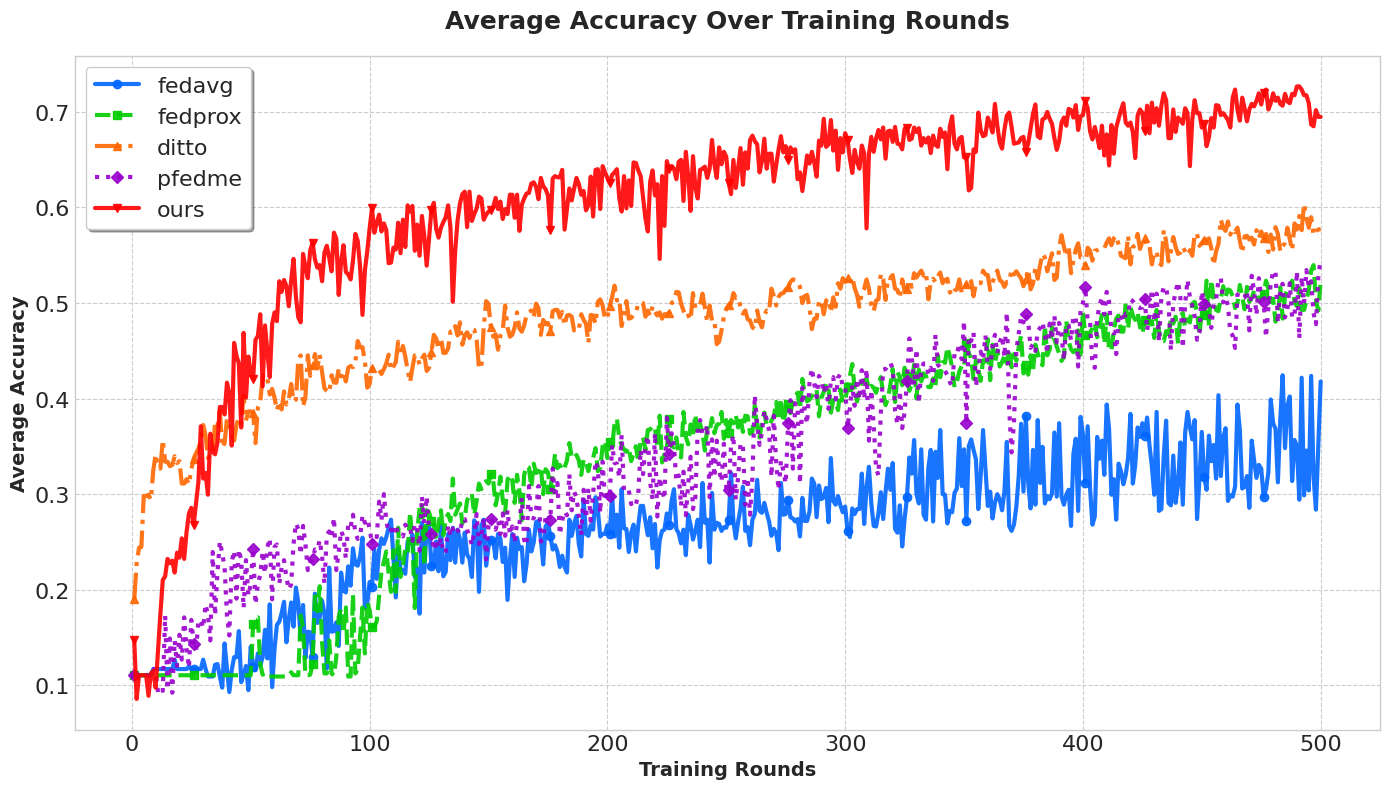

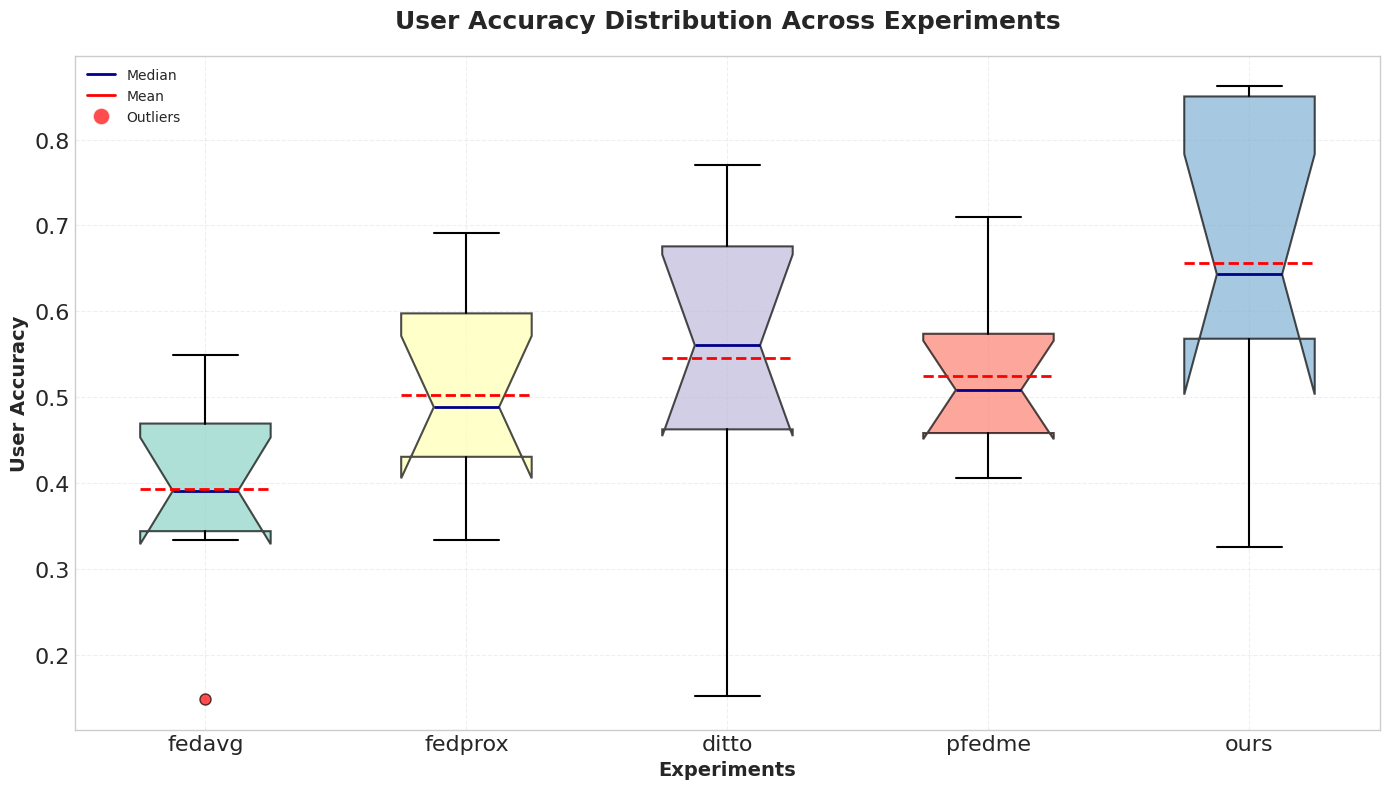

36.85%,31.25%,37.76%,42.45%,34.83%,39.26%,40.23%,31.38%,35.68%,35.03%,29.43%,42.19%,29.88%,34.57%,30.40%,42.38%,31.84%,28.39%,35.16%,41.80%
Experiment: fedavg, Variance: 20.930066, Mean: 35.54%
48.05%,48.70%,51.63%,48.37%,50.72%,51.43%,51.76%,52.34%,50.07%,49.67%,51.56%,49.28%,49.28%,50.26%,51.43%,53.39%,53.97%,50.26%,49.22%,52.41%
Experiment: fedprox, Variance: 2.592730, Mean: 50.69%
57.94%,57.23%,55.40%,55.92%,56.32%,57.88%,56.71%,55.53%,58.33%,57.68%,59.11%,57.62%,60.35%,58.92%,57.88%,58.98%,57.10%,57.55%,57.68%,57.75%
Experiment: ditto, Variance: 1.454844, Mean: 57.59%
53.32%,47.92%,51.43%,52.02%,48.50%,49.28%,52.08%,48.44%,48.63%,53.32%,46.29%,52.73%,49.93%,53.45%,51.69%,52.28%,48.96%,47.79%,52.73%,54.62%
Experiment: pfedme, Variance: 5.398515, Mean: 50.77%
71.16%,71.48%,70.83%,70.64%,71.88%,71.09%,70.90%,71.88%,71.74%,72.66%,72.66%,72.33%,71.74%,71.74%,70.90%,68.68%,68.49%,70.18%,69.47%,69.47%
Experiment: ours, Variance: 1.397534, Mean: 71.00%


In [ ]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "fedavg": "exp_office_caltech_alexnet/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "fedprox": "exp_office_caltech_alexnet/fedprox_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "ditto": "exp_office_caltech_alexnet/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2", 
    # "local": "exp_office_caltech_alexnet/local_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "pfedme": "exp_office_caltech_alexnet/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
    "ours": "exp_office_caltech_alexnet/fdse_fdse_alexnet_on_office_caltech_lr0.01_lstep2",
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    # print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

# for exp_name, acc_list in exp_acc_for_users.items():
#     # 输出每个用户的准确率，按照百分数的格式
#     print(f"Experiment: {exp_name}, User Accuracies:", end=' ')
#     print(','.join([f"{acc*100:.2f}%" for acc in acc_list]))

for exp_name, acc_list in exp_acc_for_rounds.items():
    # 输出最后20轮的准确率，按照百分数的格式
    print(','.join([f"{acc*100:.2f}%" for acc in acc_list[-20:]]))
    variance = calculate_variance(acc_list[-20:])
    mean = calculate_average(acc_list[-20:])
    print(f"Experiment: {exp_name}, Variance: {variance:.6f}, Mean: {mean:.2f}%")


# exp_loss_for_users = {}
# exp_loss_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     # print(f"Processing experiment: {exp_name} at {exp_path}")
#     loss_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, metric="test_avg_loss")
#     avg_loss_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, metric="test_avg_loss")
#     exp_loss_for_users[exp_name] = loss_list
#     exp_loss_for_rounds[exp_name] = avg_loss_list
# plot_avg_accuracy(exp_loss_for_rounds)
# plot_user_accuracy(exp_loss_for_users)


# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     # print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, "val_acc")
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, "val_acc")
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

# exp_loss_for_users = {}
# exp_loss_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     # print(f"Processing experiment: {exp_name} at {exp_path}")
#     loss_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, metric="val_avg_loss")
#     avg_loss_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, metric="val_avg_loss")
#     exp_loss_for_users[exp_name] = loss_list
#     exp_loss_for_rounds[exp_name] = avg_loss_lis's'sst
# plot_avg_accuracy(exp_loss_for_rounds)
# plot_user_accuracy(exp_loss_for_users)

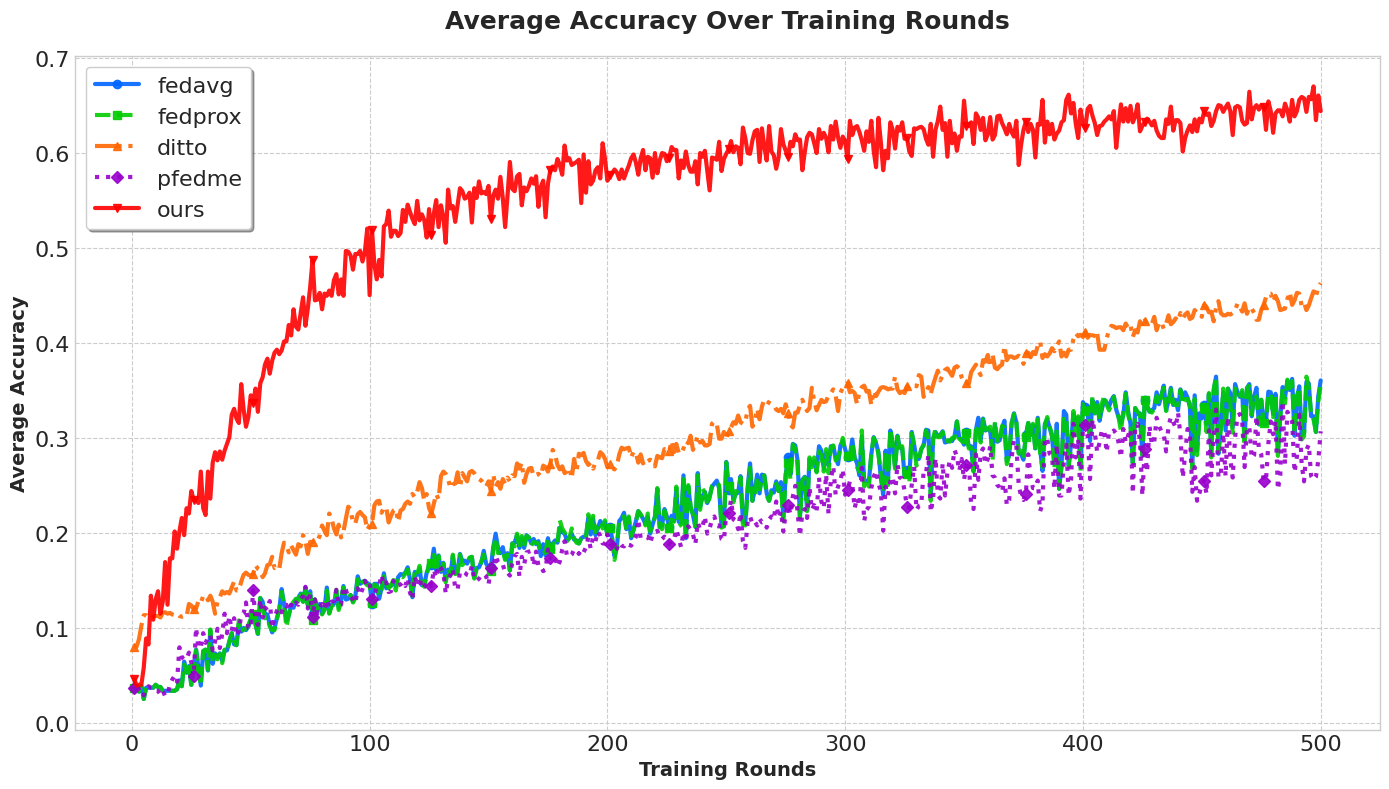

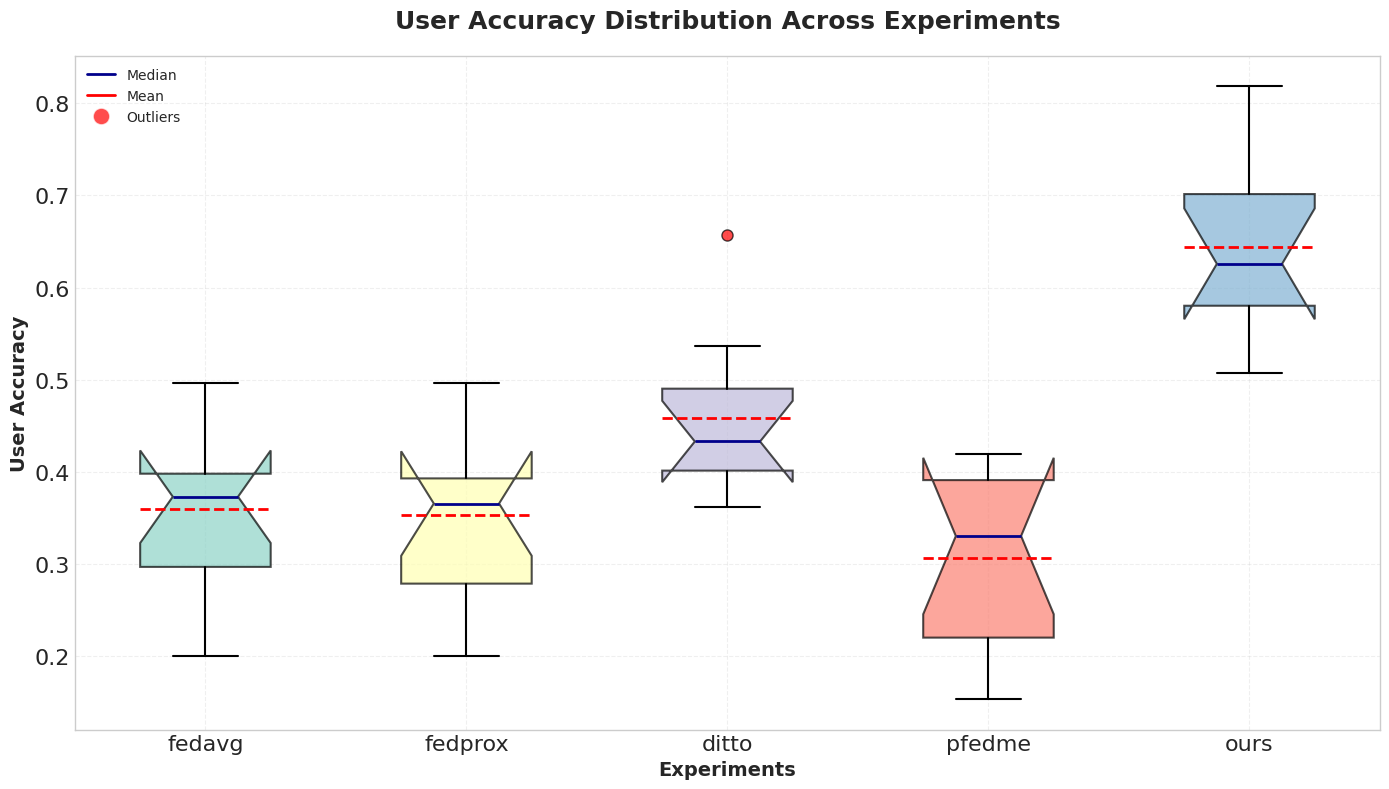

34.62%,28.64%,32.18%,35.33%,34.23%,35.96%,35.01%,36.19%,30.21%,34.15%,35.41%,30.29%,30.53%,35.88%,35.72%,32.26%,32.26%,30.61%,34.38%,36.03%
Experiment: fedavg, Variance: 5.464025, Mean: 33.49%
34.38%,28.09%,32.18%,35.17%,33.60%,36.11%,35.01%,35.96%,30.45%,34.38%,35.25%,29.82%,30.13%,36.43%,35.33%,32.34%,31.94%,30.61%,33.83%,35.56%
Experiment: fedprox, Variance: 5.779783, Mean: 33.33%
44.93%,44.37%,43.43%,43.51%,43.59%,44.61%,45.32%,43.98%,44.45%,45.24%,45.16%,43.90%,44.22%,43.43%,43.90%,44.69%,45.40%,44.85%,45.87%,46.26%
Experiment: ditto, Variance: 0.646015, Mean: 44.56%
31.79%,24.55%,26.04%,33.83%,27.22%,32.73%,32.26%,31.71%,26.36%,28.01%,32.42%,27.22%,25.41%,28.72%,29.27%,25.96%,25.57%,25.89%,27.62%,30.68%
Experiment: pfedme, Variance: 8.185901, Mean: 28.66%
64.12%,64.44%,64.44%,63.81%,65.15%,64.44%,63.26%,65.54%,63.81%,64.36%,65.54%,65.85%,65.70%,64.28%,65.85%,65.62%,66.96%,63.41%,66.01%,64.36%
Experiment: ours, Variance: 0.938119, Mean: 64.85%


In [8]:
USERS = 10
ROUNDS = 500
exp_paths = {
    "fedavg": "exp_office_31/fedavg_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "fedprox": "exp_office_31/fedprox_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "ditto": "exp_office_31/ditto_office_caltech_alexnet_on_office_31_lr0.01_lstep2", 
    # "local": "exp_office_31/local_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "pfedme": "exp_office_31/PFedMe_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
    "ours": "exp_office_31/fdse_fdse_alexnet_on_office_31_lr0.01_lstep2",
}
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    # print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS)
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS)
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list
plot_avg_accuracy(exp_acc_for_rounds)
plot_user_accuracy(exp_acc_for_users)

# for exp_name, acc_list in exp_acc_for_users.items():
#     # 输出每个用户的准确率，按照百分数的格式
#     print(f"Experiment: {exp_name}, User Accuracies:", end=' ')
#     print(','.join([f"{acc*100:.2f}%" for acc in acc_list]))

for exp_name, acc_list in exp_acc_for_rounds.items():
    print(','.join([f"{acc*100:.2f}%" for acc in acc_list[-20:]]))
    variance = calculate_variance(acc_list[-20:])
    mean = calculate_average(acc_list[-20:])
    print(f"Experiment: {exp_name}, Variance: {variance:.6f}, Mean: {mean:.2f}%")
# exp_loss_for_users = {}
# exp_loss_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     # print(f"Processing experiment: {exp_name} at {exp_path}")
#     loss_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, metric="test_avg_loss")
#     avg_loss_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, metric="test_avg_loss")
#     exp_loss_for_users[exp_name] = loss_list
#     exp_loss_for_rounds[exp_name] = avg_loss_list
# plot_avg_accuracy(exp_loss_for_rounds)
# plot_user_accuracy(exp_loss_for_users)


# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     # print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, "val_acc")
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, "val_acc")
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

# exp_loss_for_users = {}
# exp_loss_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     # print(f"Processing experiment: {exp_name} at {exp_path}")
#     loss_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, metric="val_avg_loss")
#     avg_loss_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, metric="val_avg_loss")
#     exp_loss_for_users[exp_name] = loss_list
#     exp_loss_for_rounds[exp_name] = avg_loss_list
# plot_avg_accuracy(exp_loss_for_rounds)
# plot_user_accuracy(exp_loss_for_users)

In [9]:
# USERS = 10
# ROUNDS = 500
# exp_paths = {
#     "fedavg": "exp_office_caltech_alexnet/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
#     "fedprox": "exp_office_caltech_alexnet/fedprox_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
#     "ditto": "exp_office_caltech_alexnet/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2", 
#     # "local": "exp_office_caltech_alexnet/local_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
#     "pfedme": "exp_office_caltech_alexnet/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.01_lstep2",
#     "ours": "exp_office_caltech_alexnet/fdse_fdse_alexnet_on_office_caltech_lr0.01_lstep2",
# }
# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, "val_acc")
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, "val_acc")
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

# exp_loss_for_users = {}
# exp_loss_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     loss_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, metric="val_avg_loss")
#     avg_loss_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, metric="val_avg_loss")
#     exp_loss_for_users[exp_name] = loss_list
#     exp_loss_for_rounds[exp_name] = avg_loss_list
# plot_avg_accuracy(exp_loss_for_rounds)
# plot_user_accuracy(exp_loss_for_users)

In [10]:
# USERS = 10
# ROUNDS = 500
# exp_paths = {
#     "fedavg": "exp_office_31/fedavg_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
#     "fedprox": "exp_office_31/fedprox_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
#     "ditto": "exp_office_31/ditto_office_caltech_alexnet_on_office_31_lr0.01_lstep2", 
#     # "local": "exp_office_31/local_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
#     "pfedme": "exp_office_31/PFedMe_office_caltech_alexnet_on_office_31_lr0.01_lstep2",
#     "ours": "exp_office_31/fdse_fdse_alexnet_on_office_31_lr0.01_lstep2",
# }
# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log", USERS, "val_acc")
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log", ROUNDS, "val_acc")
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)